In [ ]:
# An implementation of the Bernstein Vazirani algorithm

In [ ]:
#Importing essential libraries
import matplotlib.pyplot as plt
import numpy as np

#Importing Qiskit libraries
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

#Importing basic plotting tools
from qiskit.visualization import plot_histogram 

In [ ]:
#Number of qubits
n = 3
s = '011' #Hidden binary string

In [ ]:
#A circuit with n qubits is needed. One auxilliary qubit also needed
#n classical bits also needed to write the output to
bv_circuit = QuantumCircuit(n + 1, n)

#Set the auxilliary qubit to state <-|
bv_circuit.h(n)
bv_circuit.z(n)

#Apply hadamard gates before querying the oracle
for i in range(n):
  bv_circuit.h(i)

#Apply barrier
bv_circuit.barrier()

#Applying inner product oracle
s = s[::-1] #reverse s to fit qiskit's qubit ordering

for q in range(n):
  if s[q] == '0':
    bv_circuit.i(q)
  else:
    bv_circuit.cx(q, n)

#Apply barrier
bv_circuit.barrier()

#Apply hadamard gates after querying the oracle
for i in range(n):
  bv_circuit.h(i)

#Measurement
for i in range(n):
  bv_circuit.measure(i, i)

#Draw the circuit
bv_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

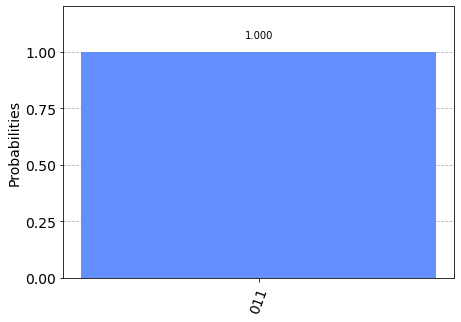

In [ ]:
#Running the code on simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

#PLot histogram
plot_histogram(answer)

In [ ]:
#Running the code on real device
token = 'db03f58cc9cf2e79a1511ba83d4055ca75ef81ac43db9b3f356f76e15677c1261f15787a2abea299dbc42614fdfd937e6afa69922349ccfd5df68ac4bb2cc159'
IBMQ.save_account(token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))

print("least busy backend: ", backend)

configrc.store_credentials:WARNING:2022-04-07 10:02:37,559: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-04-07 10:02:38,221: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito


In [ ]:
#Running the circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots = shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


In [ ]:
#Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)